In [8]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
all_emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise',6:'Neutral'}


data = pd.read_csv('/content/fer2013.csv')

print('Raw CSV Data(Number of Images)\n ', data.shape)
print('Distribution of Training and Testing data\n', data['Usage'].value_counts())
print('Distribution of Emotion Classes and its Frequency\n', data['emotion'].value_counts())

    

Raw CSV Data(Number of Images)
  (35887, 3)
Distribution of Training and Testing data
 Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64
Distribution of Emotion Classes and its Frequency
 3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


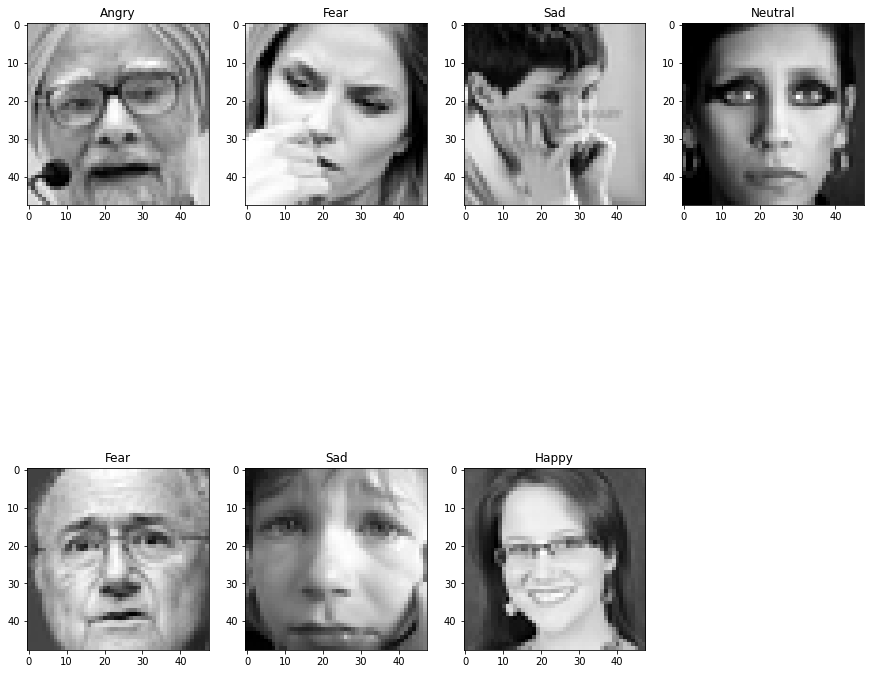

In [21]:
pixels = data['pixels'].tolist()
width, height = 48, 48
faces = []
for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(height, height)
  # norm_img = np.zeros((300, 300))
  # face = cv2.normalize(face, norm_img, 0, 255, cv2.NORM_MINMAX)
  face = cv2.resize(face.astype('uint8'), (48, 48))
  faces.append(face.astype('float32'))
faces = np.asarray(faces)
# faces = np.expand_dims(faces, -1) just for easy visualizing 
# emotions = pd.get_dummies(data['emotion']).values
emotions = data['emotion']
r = 2
c = 4
fig = plt.figure(figsize=(15,15))
for emotion in range(1,8):
  img = faces[emotion]
  fig.add_subplot(r,c,emotion)
  plt.imshow(img, cmap='gray')
  plt.title(all_emotions[emotions[emotion]])
  
plt.show()

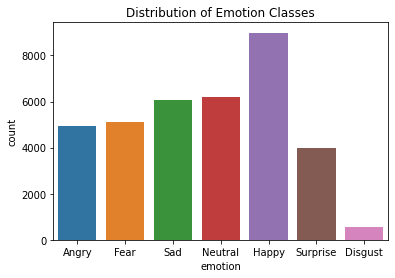

In [6]:
import seaborn as sns
emo_data = data.copy()
emo_data['emotion'] = emo_data['emotion'].map(all_emotions)
sns.countplot(x=emo_data['emotion'])
plt.title('Distribution of Emotion Classes')
plt.show()